# What is minimize doing during linear regression? 

Here we will graphically investigate what ```minimize``` is doing in the context of linear regression. 

We will use the Ratemyprofessors dataset, but will restrict the illustrations to the 'Helpfulness' and 'Clarity' variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://matthew-brett.github.io/cfd2019/data/rate_my_course.csv') # reading in the data

df_reg = df[['Helpfulness', 'Clarity']].copy() # selecting the variables of interest

df_reg.head()

,Helpfulness,Clarity
0,3.821866,3.756147
1,3.641526,3.487379
2,3.701530,3.608331
3,3.887536,3.909520
4,3.753642,3.788818


Let's say we are interested in the linear relationship between 'Helpfulness' and 'Clarity'. E.g. we want to use linear regression to predict Clarity ratings from Helpfulness ratings. 

Let's look at a scatter plot of the variables.

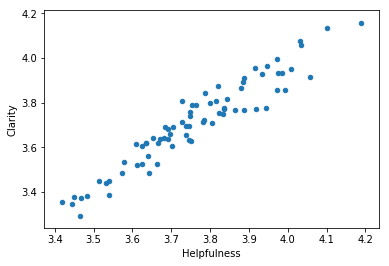

In [2]:
df_reg.plot.scatter('Helpfulness', 'Clarity');

It certainly looks like there is a straight line relationship between the two variables.

Using the method described in the 'Using minimize' page (https://matthew-brett.github.io/cfd2020/mean-slopes/using_minimize.html), we can find the line which minimizes the sum of the squared prediction errors.

In [3]:
def sos_error_for_minimize(c_s):
    # c_s has two elements, the intercept c and the slope s.
    c = c_s[0]
    s = c_s[1]
    predicted = c + df_reg['Helpfulness'] * s
    error = df_reg['Clarity'] - predicted
    return np.sum(error ** 2)

from scipy.optimize import minimize

min_res = minimize(sos_error_for_minimize, [2.25, 0.47])
display(min_res)

print('The intercept and slope of the best fitting line =', min_res.x)

      fun: 0.24216964323541595
 hess_inv: array([[ 3.27996846, -0.87098395],
       [-0.87098395,  0.23175775]])
      jac: array([-3.72529030e-09,  4.09781933e-08])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-0.36999508,  1.08536896])

The intercept and slope of the best fitting line = [-0.36999508  1.08536896]


Let's plot the predicted Clarity scores, using the intercept and slope values which the ```minimize``` function found.

You can see that the predicted data points all fall on a straight line. That line is the line of best fit for these two variables.

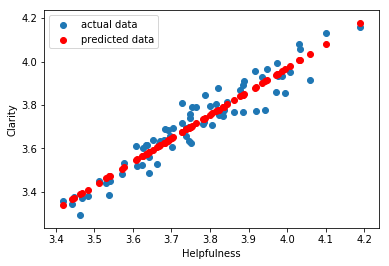

In [4]:
predicted = min_res.x[0] + min_res.x[1] * df_reg['Helpfulness'] # calculating the predicted scores
                                                                # prediction = intercept + slope * predictor

# plotting the actual data and the predicted data
plt.scatter(df_reg['Helpfulness'], df_reg['Clarity'], label = 'actual data')
plt.scatter(df_reg['Helpfulness'], predicted, color = 'red', label = 'predicted data')
plt.xlabel('Helpfulness')
plt.ylabel('Clarity')
plt.legend();

To get a clearer picture of what ```minimize``` is doing when it finds the best-fitting line, run the cell below.

The output of the cell will show several scatterplots.

Each scatterplot shows one 'attempt' that `minimize` made to find the best-fitting line. Each graph shows:

* the actual data points (shown in blue)


* the predicted data points for the slope and intercept used on that iteration (shown in red) 


* the prediction errors (shown in orange)

    
* The title of each graph shows you the intercept and slope which were used for the line on that attempt, as well as the sum of the squared errors (SSE) for that line.

You can see that on each attempt ```minimize``` tries different slopes and intercepts (e.g. it fits different lines). It does this until it finds the slope and intercept values for the line which minimizes the sum of the squared prediction errors.

Pay close attention to the orange lines on the graphs. These show the prediction errors. For a line that fits well, we want these orange lines to collectively be as short as possible.


<i> Note: </i> not every 'attempt' that `minimize` made is shown here, this is because, as `minimize` approaches its target, the changes it makes are so small the difference between them cannot be seen on the graphs (see https://matthew-brett.github.io/cfd2020/mean-slopes/optimization.html)

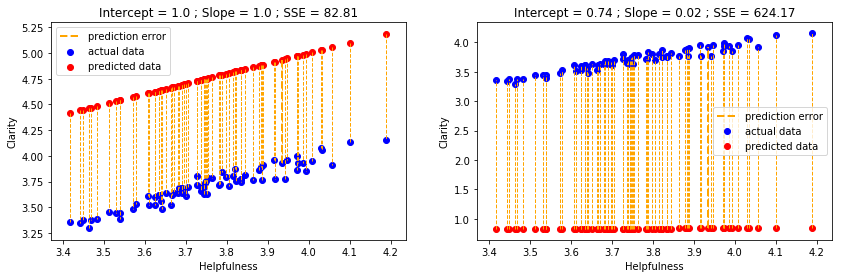

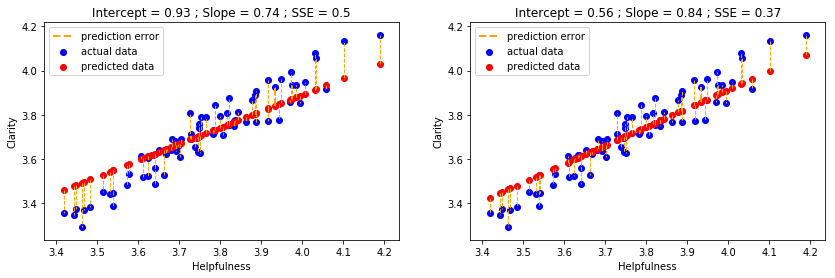

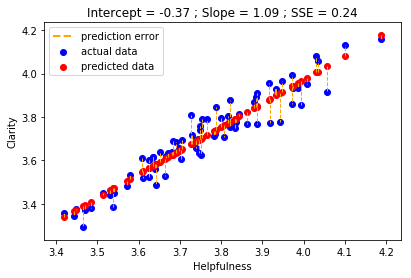

      fun: 0.24216964323555523
 hess_inv: array([[ 3.27996826, -0.8709839 ],
       [-0.8709839 ,  0.23175773]])
      jac: array([-1.86264515e-09,  3.72529030e-09])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-0.36999503,  1.08536895])

The intercept and slope of the best fitting line = [-0.36999503  1.08536895]


In [5]:
# do not worry about this code, it just generates the illustration. What minimize is doing is exactly 
# the same as in the cell above.
intercepts = []
slopes = []
SSEs = []
def sos_error_for_minimize(intercept_and_slope):
    intercept = intercept_and_slope[0]
    slope = intercept_and_slope[1]
    predicted = intercept + df_reg['Helpfulness'] * slope
    error = df_reg['Clarity'] - predicted
    intercepts.append(intercept)
    slopes.append(slope)
    SSEs.append(np.sum(error ** 2))
    return np.sum(error ** 2)
min_res = minimize(sos_error_for_minimize, [1, 1])
tracker = pd.DataFrame({ 'intercept': intercepts, 'slope': slopes, 'SSE': SSEs})
tracker_filt = tracker.copy()
for i in np.arange(1, len(tracker)):
    if np.around(tracker['SSE'].iloc[i - 1],2) == np.round(tracker['SSE'].iloc[i],2):
      tracker_filt.drop(labels = i - 1, inplace = True)
tracker_filt.index = np.arange(len(tracker_filt))
fig = plt.figure(figsize = (14,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig2 = plt.figure(figsize = (14,4))
ax3 = fig2.add_subplot(121)
ax4 = fig2.add_subplot(122)
fig3 = plt.figure(figsize = (6.4,4))
ax5 = fig3.add_subplot(111)
sub_plots = [ax1, ax2, ax3, ax4, ax5]
def sub_scatter(ax, index):
    predicted = tracker_filt['intercept'].iloc[index] + df_reg['Helpfulness'] * tracker_filt['slope'].iloc[index]
    ax.scatter(df_reg['Helpfulness'], df_reg['Clarity'], color = 'blue', label = 'actual data')
    ax.scatter(df_reg['Helpfulness'], predicted, color = 'red', label = 'predicted data')
    for i in np.arange(len(df_reg['Helpfulness'])):
        x = df_reg['Helpfulness'][i]
        y_0 = predicted[i]
        y_1 = df_reg['Clarity'][i]
        ax.plot([x, x], [y_0, y_1], '--', color='orange', linewidth=1)
    ax.plot([x, x], [y_0, y_1], '--', color='orange', linewidth=2, label = 'prediction error')
    ax.set_xlabel('Helpfulness')
    ax.set_ylabel('Clarity')
    ax.set_title('Intercept = '+str(np.round(tracker_filt['intercept'].iloc[index],2))+' ; Slope = '+str(np.round(tracker_filt['slope'].iloc[index],2))+' ; SSE = '+str(np.round(tracker_filt['SSE'].iloc[index],2)))
    ax.legend()
for i in np.arange(len(sub_plots)):
    sub_scatter(sub_plots[i], i)
plt.show()
display(min_res)
print('The intercept and slope of the best fitting line =', min_res.x)

# Parameter Space



The graph below shows the path that `minimize` took through <i> parameter space </i> whilst it found the slope and intercept which minimize the sum of the squared prediction error (SSE).

In this space, the intercept, slope and the sum of the SSE are represented on the three axes.

The parameters (the intercept and the slope) which `minimize` tried on each attempt, as well as the SSE for those parameters, are represented by a diamond. 

The red diamond was the first attempt, the black diamond was the final attempt (where the prediction error was minimized). 

The red line shows the path `minimize` took as it tried different intercept and slope pairings on its way to finding the minimum error.

<i> Note: </i> the points are in the same order as the scatterplots above. So the red diamond represents the intercept/slope/error for the first scatterplot shown above. 

The black diamond represents the intercept/slope/error for the last scatterplot shown above etc. The other coloured diamonds are for the scatterplots in between the first and last scatterplot.

Look at the intercept/slope/SSE values in the titles of the scatterplots above, and the intercept/slope/SSE values in the legend of the graph below to see how the scatterplots and the diamonds are linked.


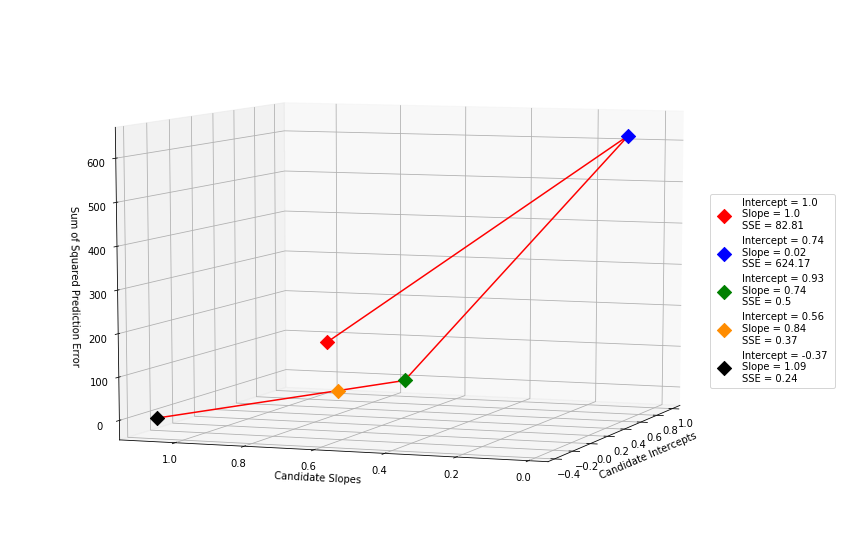

In [6]:
# do not worry about this code, it just generates the graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (14,10))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'blue', 'green', 'darkorange', 'black']
for i in np.arange(len(tracker_filt)):
  ax.scatter(tracker_filt['intercept'].iloc[i], tracker_filt['slope'].iloc[i],tracker_filt['SSE'].iloc[i], 
             marker = 'D', color = colors[i], s = 100,
            label =  'Intercept = '+str(np.round(tracker_filt['intercept'].iloc[i],2))+' \nSlope = '+str(np.round(tracker_filt['slope'].iloc[i],2))+'\nSSE = '+str(np.round(tracker_filt['SSE'].iloc[i],2)))
ax.set_xlabel('Candidate Intercepts')
ax.set_ylabel('Candidate Slopes')
ax.set_zlabel('Sum of Squared Prediction Error')
plt.legend(loc = (0.9, 0.3))
ax.plot(tracker_filt['intercept'], tracker_filt['slope'], tracker_filt['SSE'], marker = 'o', 
        label = 'Current Intercept/Slope Pair', color = 'red' )
ax.view_init(elev= 8, azim = 200)
plt.show()